In [18]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plt

In [3]:
%pwd

'/Users/qing/Desktop/study/data science/HW/hw3'

In [4]:
path = '/Users/qing/Desktop/study/data science/HW/hw3'

In [5]:
df = pd.read_csv(f'{path}/pima-indians-diabetes.data',header = None)
print(df.shape)
df.head(3)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# Pre-process, split train-test

In [6]:
X = df.iloc[:,:8]
Y = df.iloc[:,8:]

In [7]:
X = preprocessing.scale(X)
print(X[:3])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]


In [8]:
# Split Train-Test set
(X_train_valid, X_test, Y_train_valid, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=1)
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X_train_valid, Y_train_valid, test_size=0.25, random_state=1)
print(X_train.shape, X_valid.shape, X_test.shape)

(460, 8) (154, 8) (154, 8)


# Build DNN

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, init='normal', activation='sigmoid'))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="normal")`
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="normal")`
  import sys


In [10]:
# Compile the DNN
adam = Adam(lr=0.001, beta_1=0.1, beta_2=0.999, epsilon=None, decay=0.5, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=100, batch_size=5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 460 samples, validate on 154 samples
Epoch 1/100
460/460 [==============================] - 0s 727us/step - loss: 0.6880 - accuracy: 0.6500 - val_loss: 0.6798 - val_accuracy: 0.6558
Epoch 2/100
460/460 [==============================] - 0s 250us/step - loss: 0.6518 - accuracy: 0.6522 - val_loss: 0.5934 - val_accuracy: 0.6558
Epoch 3/100
460/460 [==============================] - 0s 210us/step - loss: 0.5375 - accuracy: 0.7087 - val_loss: 0.5258 - val_accuracy: 0.7338
Epoch 4/100
460/460 [==============================] - 0s 190us/step - loss: 0.4947 - accuracy: 0.7739 - val_loss: 0.5100 - val_accuracy: 0.7403
Epoch 5/100
460/460 [==============================] - 0s 195us/step - loss: 0.4881 - accuracy: 0.7717 - val_loss: 0.5052 - val_accuracy: 0.7273
Epoch 6/100
460/460 [==============================] - 0s 203us/step - loss: 0.4999 - accuracy: 0.7761 - val_loss: 0.5040 - val_accuracy: 0.7403
Epoch 7/100
460/460 [==============================] - 0s 189us/step - loss: 0.4768 

Epoch 57/100
460/460 [==============================] - 0s 187us/step - loss: 0.4423 - accuracy: 0.7957 - val_loss: 0.5087 - val_accuracy: 0.7468
Epoch 58/100
460/460 [==============================] - 0s 188us/step - loss: 0.4433 - accuracy: 0.7826 - val_loss: 0.5106 - val_accuracy: 0.7403
Epoch 59/100
460/460 [==============================] - 0s 188us/step - loss: 0.4469 - accuracy: 0.8043 - val_loss: 0.5092 - val_accuracy: 0.7403
Epoch 60/100
460/460 [==============================] - 0s 187us/step - loss: 0.4336 - accuracy: 0.7848 - val_loss: 0.5036 - val_accuracy: 0.7532
Epoch 61/100
460/460 [==============================] - 0s 191us/step - loss: 0.4407 - accuracy: 0.7978 - val_loss: 0.5075 - val_accuracy: 0.7532
Epoch 62/100
460/460 [==============================] - 0s 191us/step - loss: 0.4388 - accuracy: 0.7848 - val_loss: 0.5090 - val_accuracy: 0.7403
Epoch 63/100
460/460 [==============================] - 0s 196us/step - loss: 0.4328 - accuracy: 0.7891 - val_loss: 0.5110 -

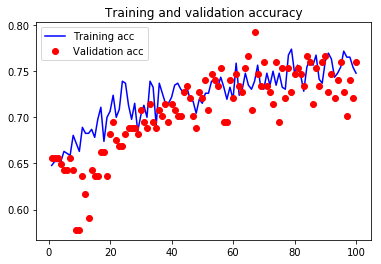

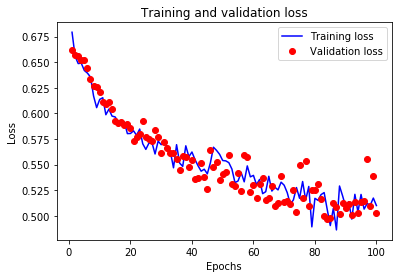

In [273]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'ro', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'ro', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ROC, AUC

In [13]:
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

154/154 [==============================] - 0s 26us/step
Accuracy: 80.52%


In [14]:
Y_test_predict = model.predict_classes(X_test)
fpnum, tpnum, thresholds = roc_curve(Y_test,Y_test_predict)

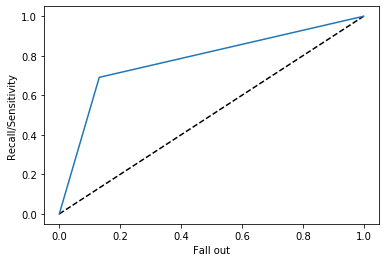

In [19]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpnum,tpnum, label='CNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.show()

In [16]:
roc_auc_score(Y_test,Y_test_predict)

0.7797979797979798